# Oficina 5: Implementando modelo

Você é um cientista de dados contratado por uma empresa imobiliária para desenvolver um modelo que ajude a prever o preço de casas com base em algumas características. 

A empresa possui um grande banco de dados com informações sobre diversas propriedades, como tamanho do lote, número de quartos, idade da casa, entre outras. Eles acreditam que, com um modelo preditivo eficiente, poderão ajustar melhor seus preços e oferecer melhores recomendações aos seus clientes.

Nesse cenário, você será guiado na construção de um modelo de regressão linear simples, mas eficaz, para prever o preço das casas usando Python e a biblioteca Scikit-learn. 

Você vai trabalhar com um dataset que contém informações de vendas de casas em uma cidade dos EUA. Você precisa criar um dataset com as seguintes colunas:

- Área do lote (em pés quadrados);

- Ano de construção da casa;

- Área do primeiro andar (em pés quadrados);

- Área do segundo andar (em pés quadrados); 

- Número de banheiros completos;

- Número de quartos acima do solo;

- Número total de quartos acima do solo (excluindo banheiros);

- Preço de venda da casa (em reais).

Seu objetivo é construir um modelo que use as outras variáveis do dataset para prever o preço de venda da casa.

Lembre-se: esta oficina deverá ser realizada no Google Colab, uma ferramenta on-line gratuita que facilita o uso de Python sem a necessidade de instalações locais.

Bons estudos!

# Imports

In [1]:
# Manipulação de Dados:
import numpy as np
import pandas as pd
# Gráficos:
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão Treino e Teste:
from sklearn.model_selection import train_test_split

# Regressão Linear:
from sklearn.linear_model import LinearRegression

# Métricas:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Formatação da Página

# Criação do Dataset:

- Área do lote (em pés quadrados);

- Ano de construção da casa;

- Área do primeiro andar (em pés quadrados);

- Área do segundo andar (em pés quadrados); 

- Número de banheiros completos;

- Número de quartos acima do solo;

- Número total de quartos acima do solo (excluindo banheiros);

- Preço de venda da casa (em reais).

In [2]:
# Gerando um dataset fictício
np.random.seed(42)
n = 1000  # Número de amostras

In [5]:
data = {
    "lote_area": np.random.randint(1500, 10000, n),
    "ano_construcao": np.random.randint(1950, 2023, n),
    "area_1o_andar": np.random.randint(500, 2500, n),
    "area_2o_andar": np.random.randint(0, 2000, n),
    "num_banheiros": np.random.randint(1, 4, n),
    "num_quartos": np.random.randint(1, 6, n),
    "num_total_quartos": np.random.randint(1, 6, n),
}

In [6]:
# Criando um preço de venda fictício com base nos atributos
preco_base = 50000
preco = (
    preco_base +
    data["lote_area"] * 5 +
    (2023 - data["ano_construcao"]) * -500 +
    data["area_1o_andar"] * 150 +
    data["area_2o_andar"] * 100 +
    data["num_banheiros"] * 20000 +
    data["num_quartos"] * 15000 +
    np.random.randint(-10000, 10000, n)  # Ruído aleatório
)

data["Preco_Venda"] = preco

In [7]:
# Criando o DataFrame
df = pd.DataFrame(data)

In [8]:
df.head()

,lote_area,ano_construcao,area_1o_andar,area_2o_andar,num_banheiros,num_quartos,num_total_quartos,Preco_Venda
0,5997,1982,1681,1170,1,3,1,489279
1,9433,1981,1969,1709,3,3,2,648493
2,3635,2010,1152,1968,2,3,2,515535
3,8227,2003,1457,789,3,2,2,473275
4,3065,1966,1262,333,1,3,5,317732


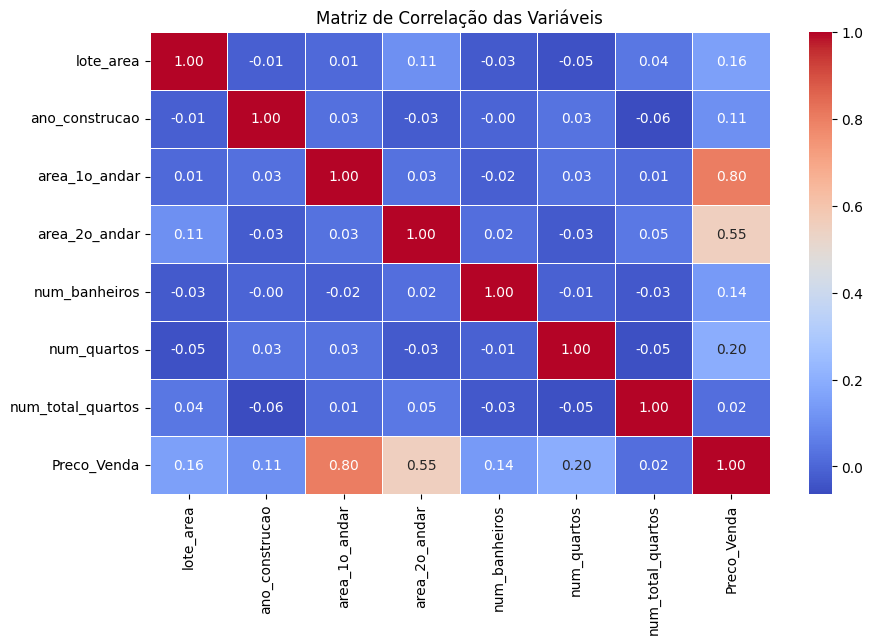

In [17]:
# Gráfico de correlação
df_corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

# Divisão Treino e Teste:

In [10]:
# Dividindo os dados em X e y:
X = df.drop(columns=["Preco_Venda"])
y = df["Preco_Venda"]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Modelo

In [11]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [12]:
# Fazendo previsões
y_pred = modelo.predict(X_test)

In [13]:
# Avaliando o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [14]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 4805.09
MSE: 31056096.26
RMSE: 5572.80
R²: 0.9978


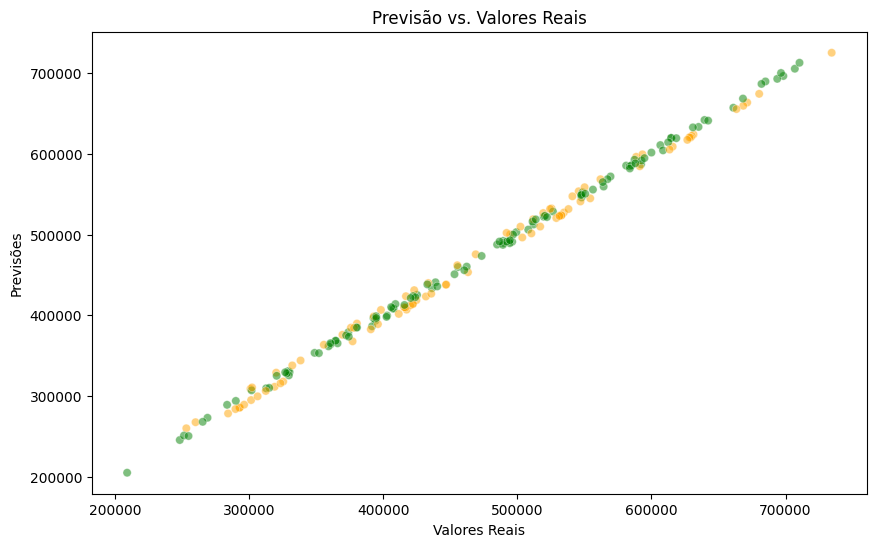

In [16]:
# Visualizando as previsões com cores de acordo com o erro
plt.figure(figsize=(10, 6))
errors = abs(y_test - y_pred)
colors = np.where(errors < rmse, 'green', np.where(errors < 2 * rmse, 'orange', 'red'))
sns.scatterplot(x=y_test, y=y_pred, hue=colors, alpha=0.5, palette={"green": "green", "orange": "orange", "red": "red"}, legend=False)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsão vs. Valores Reais")
plt.show()